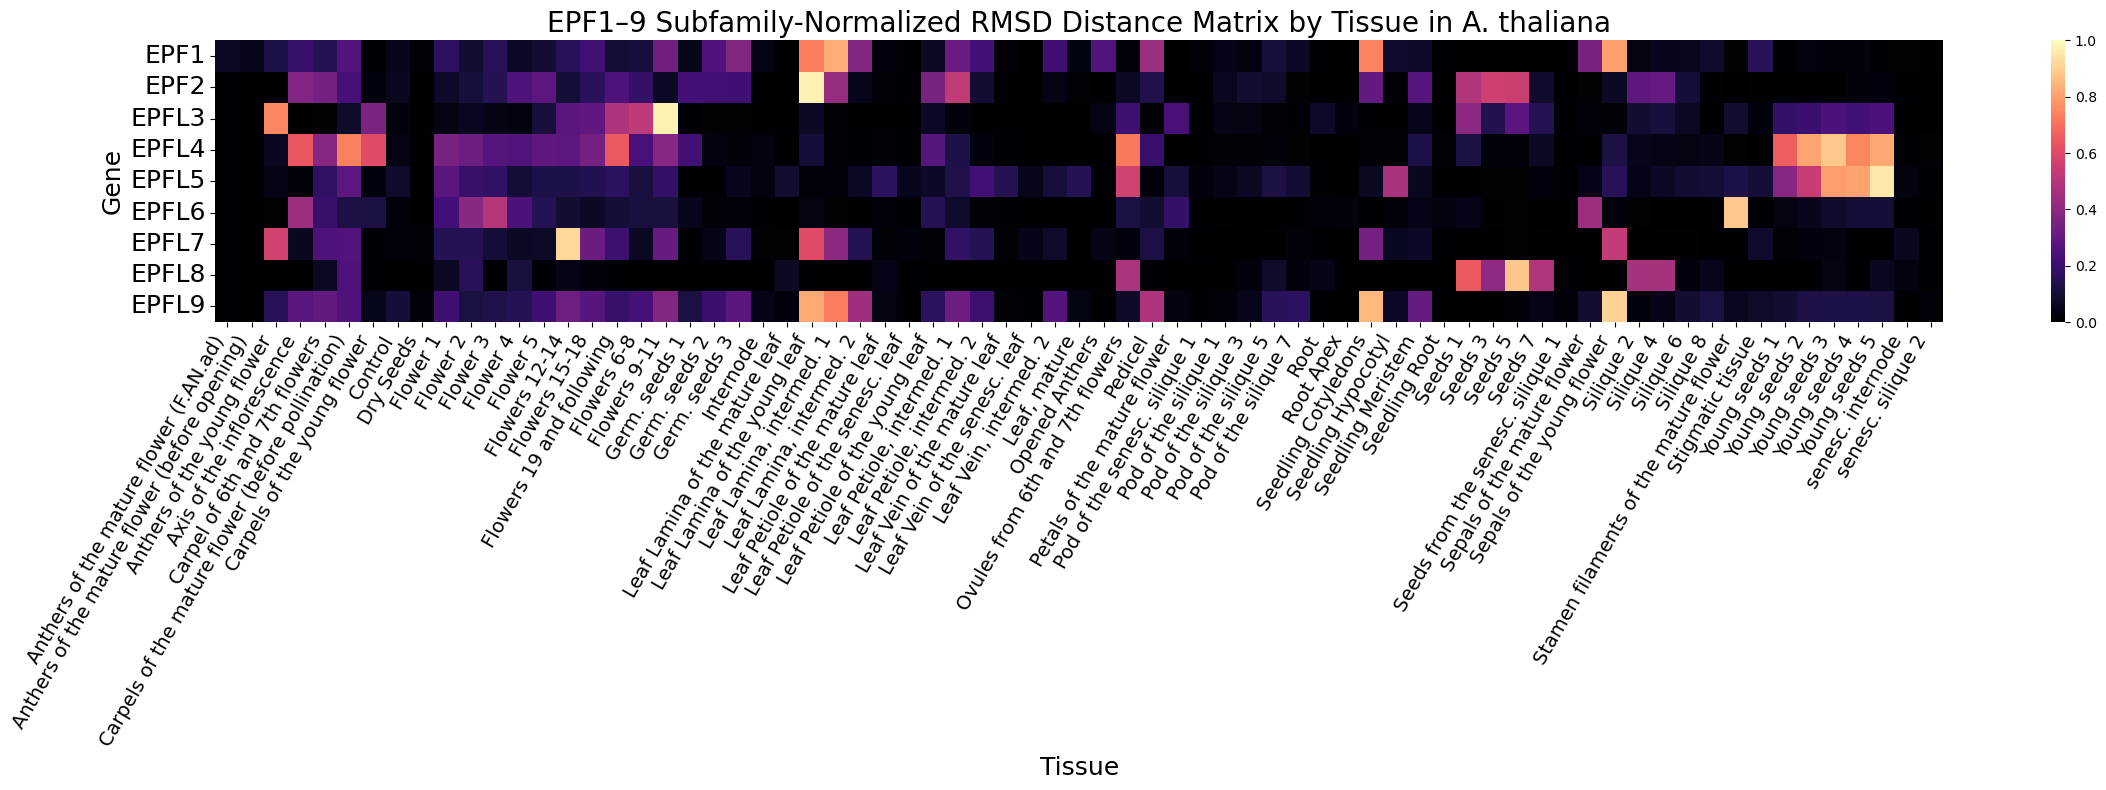

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_expr = pd.read_csv("[file path here]/Klepikova_eFP_EPFL_family_expression.txt", header=None, names=["Gene","Identifier","RMSD"])
df_tissue = pd.read_csv("[file path here]/ Klepikova_eFP_expression_dictionary.txt", header=None, names=["Identifier","Tissue"])

# Merge
df = df_expr.merge(df_tissue, on="Identifier", how="left")

# Simplify tissue labels
df["Tissue_simple"] = df["Tissue"].str.replace(r" Rep \d+","", regex=True)
df["Tissue_simple"] = df["Tissue_simple"].str.replace(r"^A\.thal\.\s*", "", regex=True)

# ----------------------------
# 2. Define subfamilies
# ----------------------------
# Example: adjust these groupings to match your biological classification
subfamily_map = {
    "EPF1": "EPF1",
    "EPF2": "EPF2",
    "EFPL1":"EPFL1",
    "EFPL2":"EPFL2",
    "EPFL3": "EPFL3",
    "EPFL4": "EPFL4",
    "EPFL5": "EPFL5",
    "EPFL6": "EPFL6",
    "EPFL7": "EPFL7",
    "EPFL8": "EPFL8",
    "EPFL9": "EPFL9"
}
df["Subfamily"] = df["Gene"].map(subfamily_map)

# ----------------------------
# 3. Normalize within subfamily
# ----------------------------
# Here we do min-max normalization per subfamily
df["RMSD_norm"] = df.groupby("Subfamily")["RMSD"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else 0
)

# ----------------------------
# 4. Pivot into matrix
# ----------------------------
matrix = df.pivot_table(
    index="Gene",
    columns="Tissue_simple",
    values="RMSD_norm",
    aggfunc="mean"
)

# ----------------------------
# 5. Plot heatmap
# ----------------------------
fig, ax = plt.subplots(figsize=(24,8))
sns.heatmap(matrix, annot=False, cmap="magma", ax=ax, vmin=0, vmax=1)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=18, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=60, ha="right")

plt.title("EPF1–9 Subfamily-Normalized RMSD Distance Matrix by Tissue in A. thaliana", fontsize=20)
plt.ylabel("Gene", fontsize=18)
plt.xlabel("Tissue", fontsize=18)

plt.tight_layout()
plt.savefig(
    'C:/School/EPFL Gene Family Project/Klepikova Heatmap/HEATMAP_subfamily_norm.png',
    bbox_inches="tight"
)
plt.show()